In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
# evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100)
evaluation = execute_ai_simulation(start_time=0, finish_time=None, scheme='random', mtd_interval=None, custom_strategies=None,
                       checkpoints=None, total_nodes=50, total_endpoints=5, total_subnets=8, total_layers=4,
                       target_layer=4, total_database=2, terminate_compromise_ratio=0.8, new_network=False)

Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: Interrupted EXPLOIT_VULN at 120.2s!
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 200.7s
Action: 1
MTD: OSDiversity triggered 401.3s
Action: 0
Action: 0
Action: 0
Action: 1
MTD: IPShuffle triggered 601.4s
MTD: Interrupted EXPLOIT_VULN at 711.6s!
Action: 1
MTD: OSDiversity triggered 801.4s
Action: 1
MTD: IPShuffle triggered 1001.5s
MTD: Interrupted SCAN_PORT at 1112.2s!
Action: 1
MTD: OSDiversity triggered 1201.9s
Action: 1
MTD: OSDiversity triggered 1402.9s
Action: 0
Action: 1
MTD: ServiceDiversity triggered 1604.6s
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 1805.4s
MTD: Interrupted EXPLOIT_VULN at 1925.6s!
Action: 0
Action: 0
Action: 1
MTD: IPShuffle triggered 2005.6s
MTD: Interrupted SCAN_PORT at 2115.6s!
Action: 1
MTD: IPShuffle triggered 2205.8s
MTD: Interrupted EXPLOIT_VULN at 2315.9s!
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 240

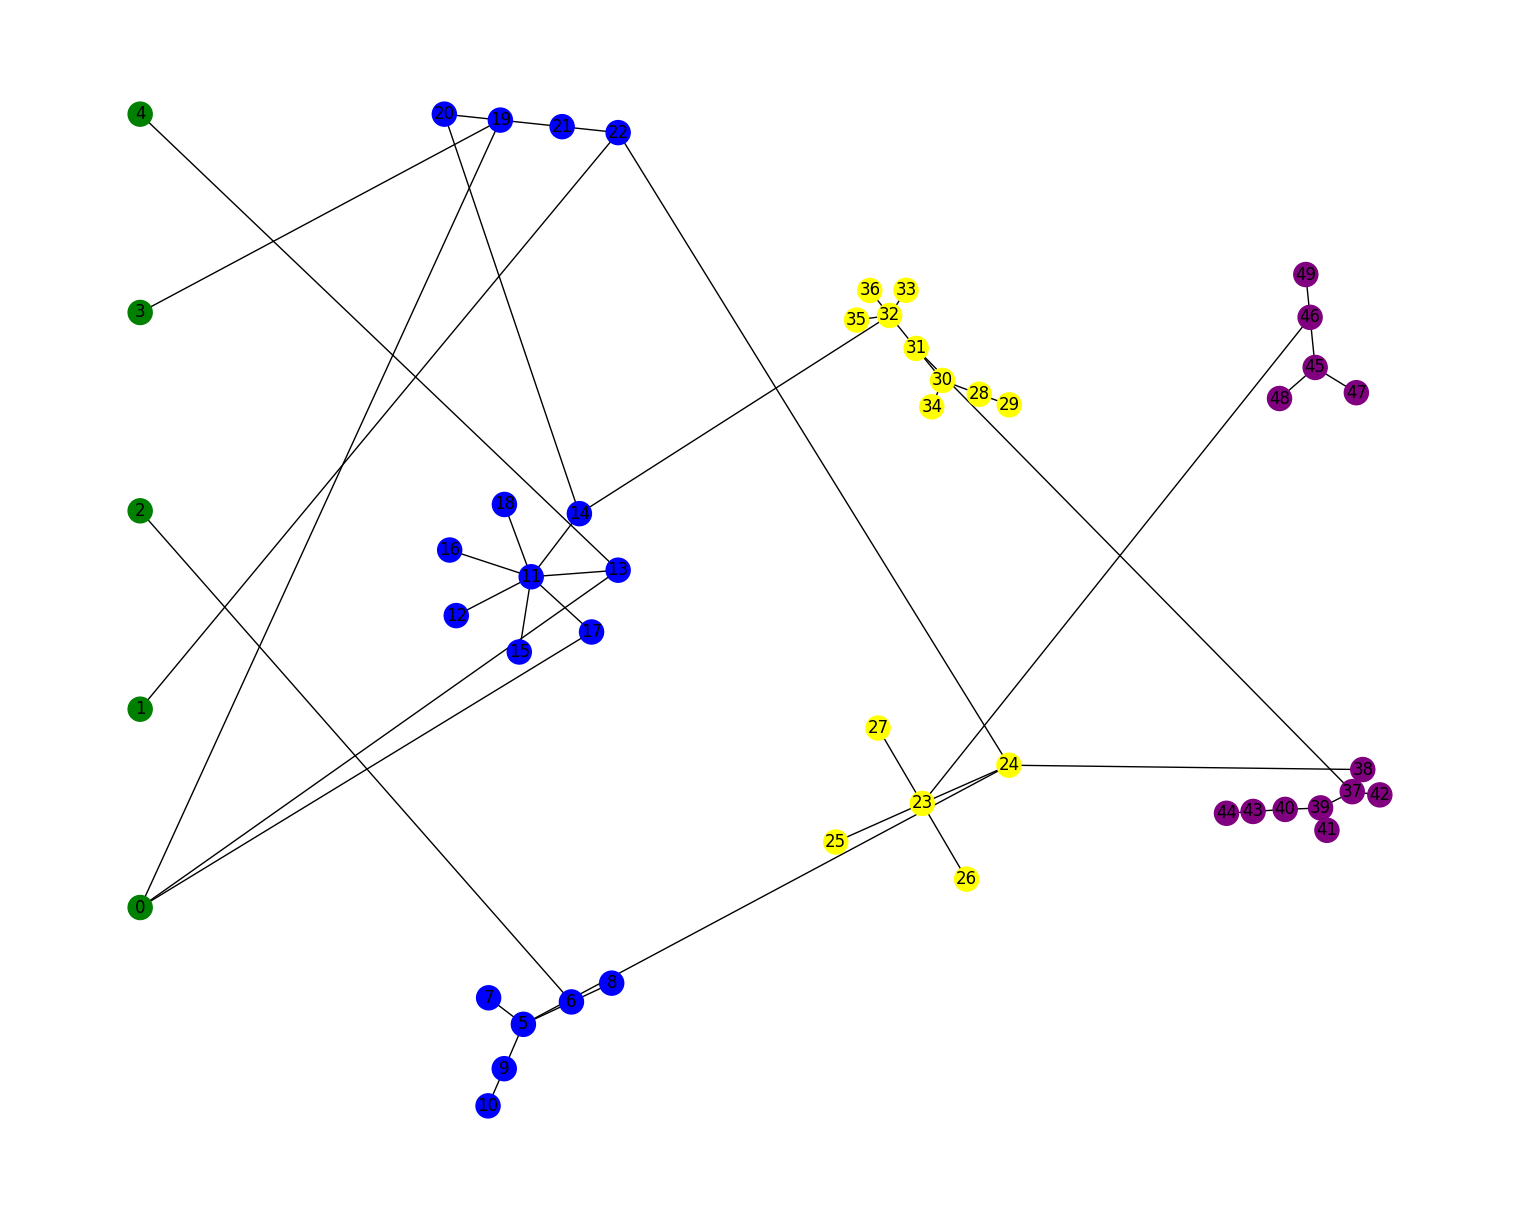

In [4]:
evaluation.get_network().draw()
plt.show()

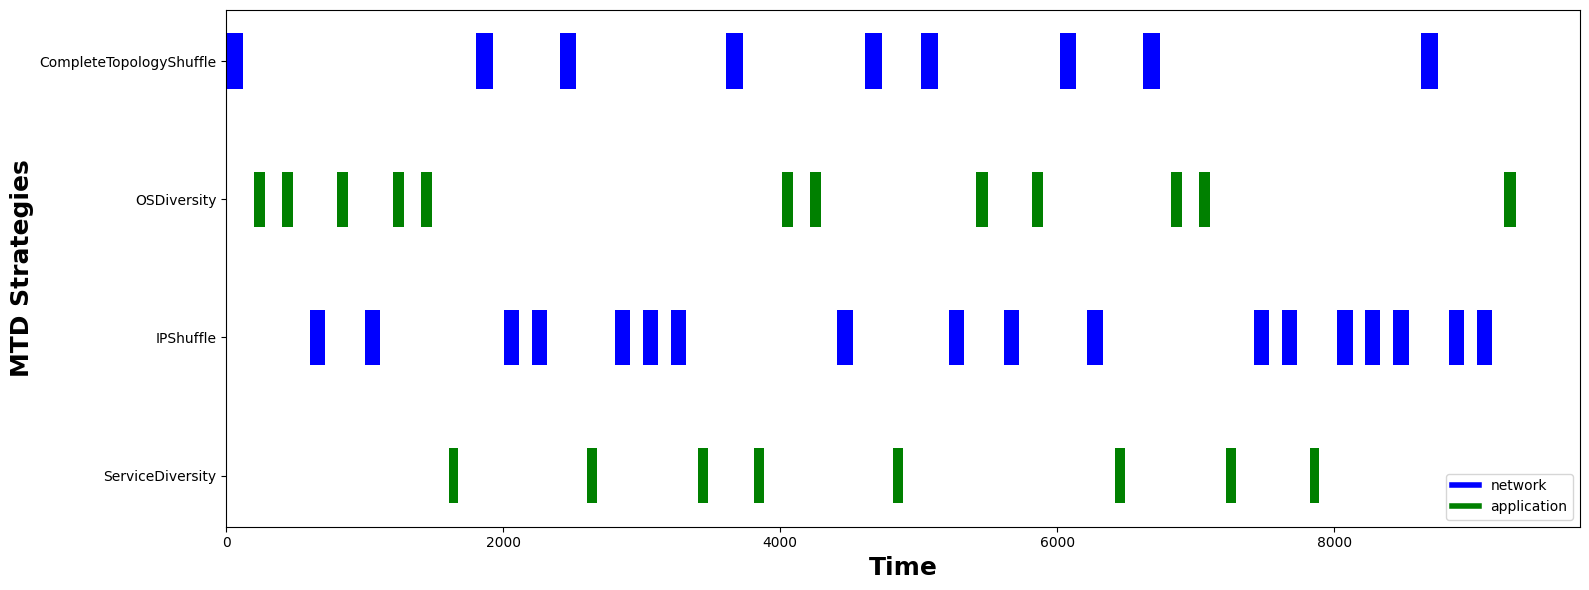

In [5]:
evaluation.visualise_mtd_operation()

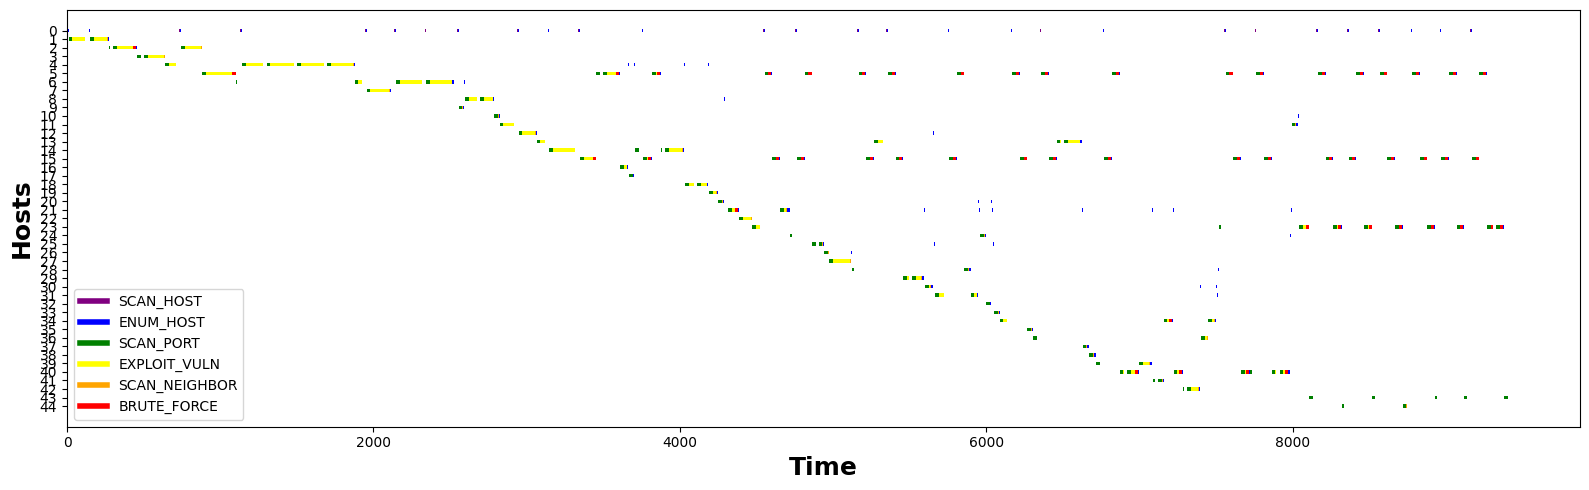

In [6]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  41


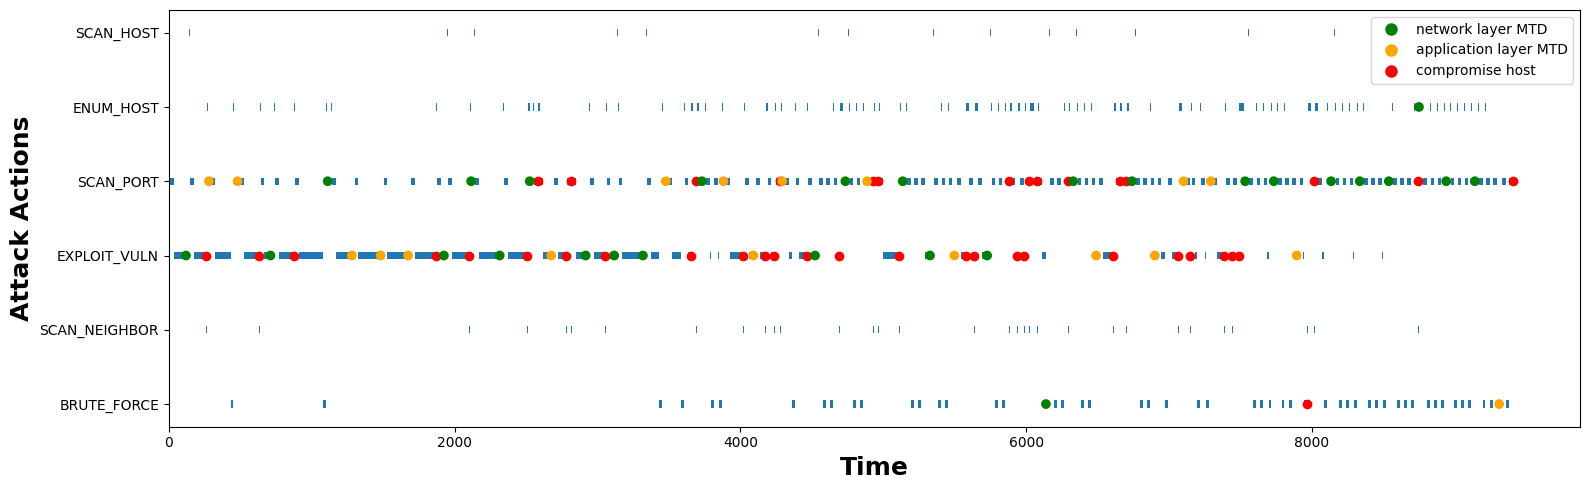

In [7]:
evaluation.visualise_attack_operation()

In [8]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
28,EXPLOIT_VULN,255.690970,261.072422,5.381452,0,050be4d0-5218-4498-91f8-554b8ca032cc,0,050be4d0-5218-4498-91f8-554b8ca032cc,2,21,0,"[Lissy, Barbette, Lea, Elenore]",None,None,yellow,1
68,EXPLOIT_VULN,627.035413,632.089672,5.054259,1,4b8a5a48-c8df-4019-9365-ea2e6ea5ba96,1,4b8a5a48-c8df-4019-9365-ea2e6ea5ba96,1,53,1,"[Norene, Sarina, Gussie]",None,None,yellow,3
100,EXPLOIT_VULN,860.449138,873.842297,13.393159,11,5615d48c-7f52-41f9-908f-4529b348277d,11,5615d48c-7f52-41f9-908f-4529b348277d,2,78,2,"[Lurleen, Concordia, Kristien]",None,None,yellow,2
199,EXPLOIT_VULN,1859.551169,1866.608063,7.056894,5,b959b52a-c029-4c34-b63a-305ab92882db,5,b959b52a-c029-4c34-b63a-305ab92882db,2,162,3,"[Cyb, Jodee, Ynes]",None,None,yellow,4
230,EXPLOIT_VULN,2086.663807,2104.280609,17.616803,8,a2bce950-3670-423c-b52f-5dfc52db3fd2,8,a2bce950-3670-423c-b52f-5dfc52db3fd2,1,186,4,"[Lianne, Tildie, Loralee, Claudina]",None,None,yellow,7
271,EXPLOIT_VULN,2505.927660,2509.966934,4.039274,15,5df8d2ea-1c35-40d2-83c9-6da48b218fd9,15,5df8d2ea-1c35-40d2-83c9-6da48b218fd9,5,217,5,"[Sibbie, Elyssa]",None,None,yellow,6
278,SCAN_PORT,2556.435325,2581.435325,25.000000,14,9d813f3b-eed1-4336-a66e-70a5f6a6cd0e,14,9d813f3b-eed1-4336-a66e-70a5f6a6cd0e,1,218,6,"[Hyacinthe, Rosalie, Edita]",None,None,green,9
301,EXPLOIT_VULN,2772.862000,2778.849084,5.987084,26,67b248e2-20eb-4484-90d1-3daa4abcb185,26,67b248e2-20eb-4484-90d1-3daa4abcb185,2,234,7,"[Sile, Mariana]",None,None,yellow,8
304,SCAN_PORT,2788.849084,2813.849084,25.000000,25,94579bfa-516a-47f7-ab4b-0dc03273281d,25,94579bfa-516a-47f7-ab4b-0dc03273281d,1,235,8,[Dorree],None,None,green,10
332,EXPLOIT_VULN,3052.491693,3055.084026,2.592333,19,8e7f5550-aba6-49ce-ad49-4e7408c74568,19,8e7f5550-aba6-49ce-ad49-4e7408c74568,1,255,9,"[Henka, Charis]",None,None,yellow,12


In [9]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
278,SCAN_PORT,2556.435325,2581.435325,25.0,14,9d813f3b-eed1-4336-a66e-70a5f6a6cd0e,14,9d813f3b-eed1-4336-a66e-70a5f6a6cd0e,1,218,6,"[Hyacinthe, Rosalie, Edita]",None,None,green,9
304,SCAN_PORT,2788.849084,2813.849084,25.0,25,94579bfa-516a-47f7-ab4b-0dc03273281d,25,94579bfa-516a-47f7-ab4b-0dc03273281d,1,235,8,[Dorree],None,None,green,10
394,SCAN_PORT,3667.308232,3692.308232,25.0,7,ac8863fc-6146-4c90-88fd-86e78c7cffc0,7,ac8863fc-6146-4c90-88fd-86e78c7cffc0,1,296,11,[],None,None,green,17
448,SCAN_PORT,4252.091974,4277.091974,25.0,40,257a5dee-cbea-49d1-9fe4-631f771f8d68,40,257a5dee-cbea-49d1-9fe4-631f771f8d68,1,322,15,[Freddy],None,None,green,20
498,SCAN_PORT,4906.227038,4931.227038,25.0,18,2dd805eb-1f20-4862-a1b9-1c41b1899da2,18,2dd805eb-1f20-4862-a1b9-1c41b1899da2,1,335,18,[Inger],None,None,green,25
501,SCAN_PORT,4941.227038,4966.227038,25.0,20,c4fad004-0219-4319-87a1-7416b3e8a826,20,c4fad004-0219-4319-87a1-7416b3e8a826,1,335,19,[Avrit],None,None,green,26
600,SCAN_PORT,5857.876449,5882.876449,25.0,42,75f0adba-7823-40c4-9f00-375b1507fe8c,42,75f0adba-7823-40c4-9f00-375b1507fe8c,2,383,23,[Mirna],None,None,green,28
615,SCAN_PORT,5996.923235,6021.923235,25.0,44,a93cbf1e-5e8b-48d2-b733-5a4132f85a0f,44,a93cbf1e-5e8b-48d2-b733-5a4132f85a0f,1,386,26,[Pris],None,None,green,32
622,SCAN_PORT,6051.923235,6076.923235,25.0,17,fa5c9357-c5d0-47c5-aedb-10332b0bce53,17,fa5c9357-c5d0-47c5-aedb-10332b0bce53,1,386,27,[],None,None,green,33
641,SCAN_PORT,6268.685262,6293.685262,25.0,30,0dfd4536-cddb-42f8-bc60-24ac1029f597,30,0dfd4536-cddb-42f8-bc60-24ac1029f597,1,392,28,"[Miriam, Dyanne]",None,None,green,35


In [10]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
28,EXPLOIT_VULN,255.690970,261.072422,5.381452,0,050be4d0-5218-4498-91f8-554b8ca032cc,0,050be4d0-5218-4498-91f8-554b8ca032cc,2,21,0,"[Lissy, Barbette, Lea, Elenore]",None,None,yellow,1
68,EXPLOIT_VULN,627.035413,632.089672,5.054259,1,4b8a5a48-c8df-4019-9365-ea2e6ea5ba96,1,4b8a5a48-c8df-4019-9365-ea2e6ea5ba96,1,53,1,"[Norene, Sarina, Gussie]",None,None,yellow,3
100,EXPLOIT_VULN,860.449138,873.842297,13.393159,11,5615d48c-7f52-41f9-908f-4529b348277d,11,5615d48c-7f52-41f9-908f-4529b348277d,2,78,2,"[Lurleen, Concordia, Kristien]",None,None,yellow,2
199,EXPLOIT_VULN,1859.551169,1866.608063,7.056894,5,b959b52a-c029-4c34-b63a-305ab92882db,5,b959b52a-c029-4c34-b63a-305ab92882db,2,162,3,"[Cyb, Jodee, Ynes]",None,None,yellow,4
230,EXPLOIT_VULN,2086.663807,2104.280609,17.616803,8,a2bce950-3670-423c-b52f-5dfc52db3fd2,8,a2bce950-3670-423c-b52f-5dfc52db3fd2,1,186,4,"[Lianne, Tildie, Loralee, Claudina]",None,None,yellow,7
271,EXPLOIT_VULN,2505.927660,2509.966934,4.039274,15,5df8d2ea-1c35-40d2-83c9-6da48b218fd9,15,5df8d2ea-1c35-40d2-83c9-6da48b218fd9,5,217,5,"[Sibbie, Elyssa]",None,None,yellow,6
301,EXPLOIT_VULN,2772.862000,2778.849084,5.987084,26,67b248e2-20eb-4484-90d1-3daa4abcb185,26,67b248e2-20eb-4484-90d1-3daa4abcb185,2,234,7,"[Sile, Mariana]",None,None,yellow,8
332,EXPLOIT_VULN,3052.491693,3055.084026,2.592333,19,8e7f5550-aba6-49ce-ad49-4e7408c74568,19,8e7f5550-aba6-49ce-ad49-4e7408c74568,1,255,9,"[Henka, Charis]",None,None,yellow,12
390,EXPLOIT_VULN,3637.841132,3652.308232,14.467100,9,d3cec7a5-a6d2-463d-9afd-0a187d4801c9,9,d3cec7a5-a6d2-463d-9afd-0a187d4801c9,1,295,10,"[Kissiah, Evvie, Latrina]",None,None,yellow,16
422,EXPLOIT_VULN,4009.509715,4017.419020,7.909304,6,e338bcf7-5d54-4c7f-964b-25d9b7463af9,6,e338bcf7-5d54-4c7f-964b-25d9b7463af9,3,309,12,[],None,None,yellow,14


In [11]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
784,BRUTE_FORCE,7948.000429,7968.000429,20.0,39,dc670a8a-ea70-4a12-a53f-6c9f04f92700,39,dc670a8a-ea70-4a12-a53f-6c9f04f92700,5,434,37,[],None,None,red,40


In [12]:
evaluation.evaluation_result_by_compromise_checkpoint()

[{'time_to_compromise': 2154.652730500951,
  'attack_success_rate': 0.2631578947368421,
  'host_compromise_ratio': 0.1,
  'mtd_execution_frequency': 0.005047982257401492},
 {'time_to_compromise': 3065.406599546928,
  'attack_success_rate': 0.3125,
  'host_compromise_ratio': 0.2,
  'mtd_execution_frequency': 0.005047982257401492},
 {'time_to_compromise': 3534.614448150308,
  'attack_success_rate': 0.35714285714285715,
  'host_compromise_ratio': 0.3,
  'mtd_execution_frequency': 0.005047982257401492},
 {'time_to_compromise': 4172.0258189965825,
  'attack_success_rate': 0.35714285714285715,
  'host_compromise_ratio': 0.4,
  'mtd_execution_frequency': 0.005047982257401492},
 {'time_to_compromise': 4801.123139872716,
  'attack_success_rate': 0.352112676056338,
  'host_compromise_ratio': 0.5,
  'mtd_execution_frequency': 0.005047982257401492},
 {'time_to_compromise': 5283.3217780522,
  'attack_success_rate': 0.3614457831325301,
  'host_compromise_ratio': 0.6,
  'mtd_execution_frequency': 0.0